In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib import rc
rc('axes', fc='w')
rc('figure', fc='w')
rc('savefig', fc='w')
rc('axes', axisbelow=True)

# Tip 1
Problem: "I never remember which matplotlib functions have "set_" in front of them and which dont... also how do you make log-scaled axes? Also ughhh."

Solution: Commit to making everything a subplot.

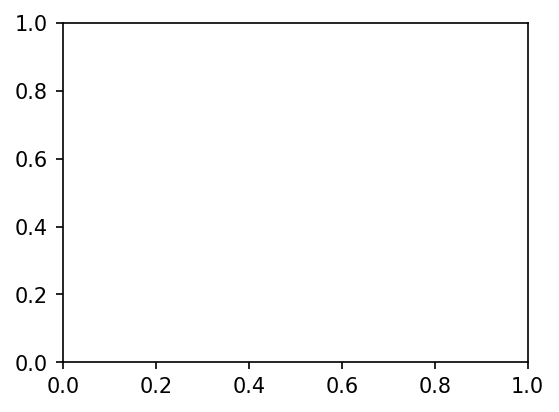

In [2]:
w = 4
h = 3
fig, ax = plt.subplots(1, 1, figsize=(w,h), dpi=150)


plt.show()

________________

# Tip 2
Think about future you. You might be sharing these figs with colleagues. In that case, a simple png is nice. Same with slides. If you're putting them into your manuscript, 97% of the time, you're gonna wanna use pdfs.

I usually have a directory structure that looks something like:

- code/
    - this_notebook.ipynb
    - other_dot_py_files.py
- data/
- figs/
    - pngs/
        - figure1.png
        - etc...
    - pdfs/
        - figure1.pdf
        - etc...

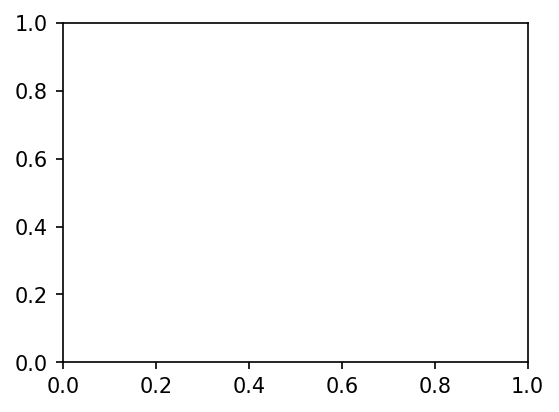

In [3]:
w = 4
h = 3
fig, ax = plt.subplots(1, 1, figsize=(w,h), dpi=150)


# plt.savefig('../figs/pngs/figure1.png', dpi=425, bbox_inches='tight')
# plt.savefig('../figs/pdfs/figure1.pdf', bbox_inches='tight')
plt.show()

_______________

# Tip 3
Different SIZED subplOTS

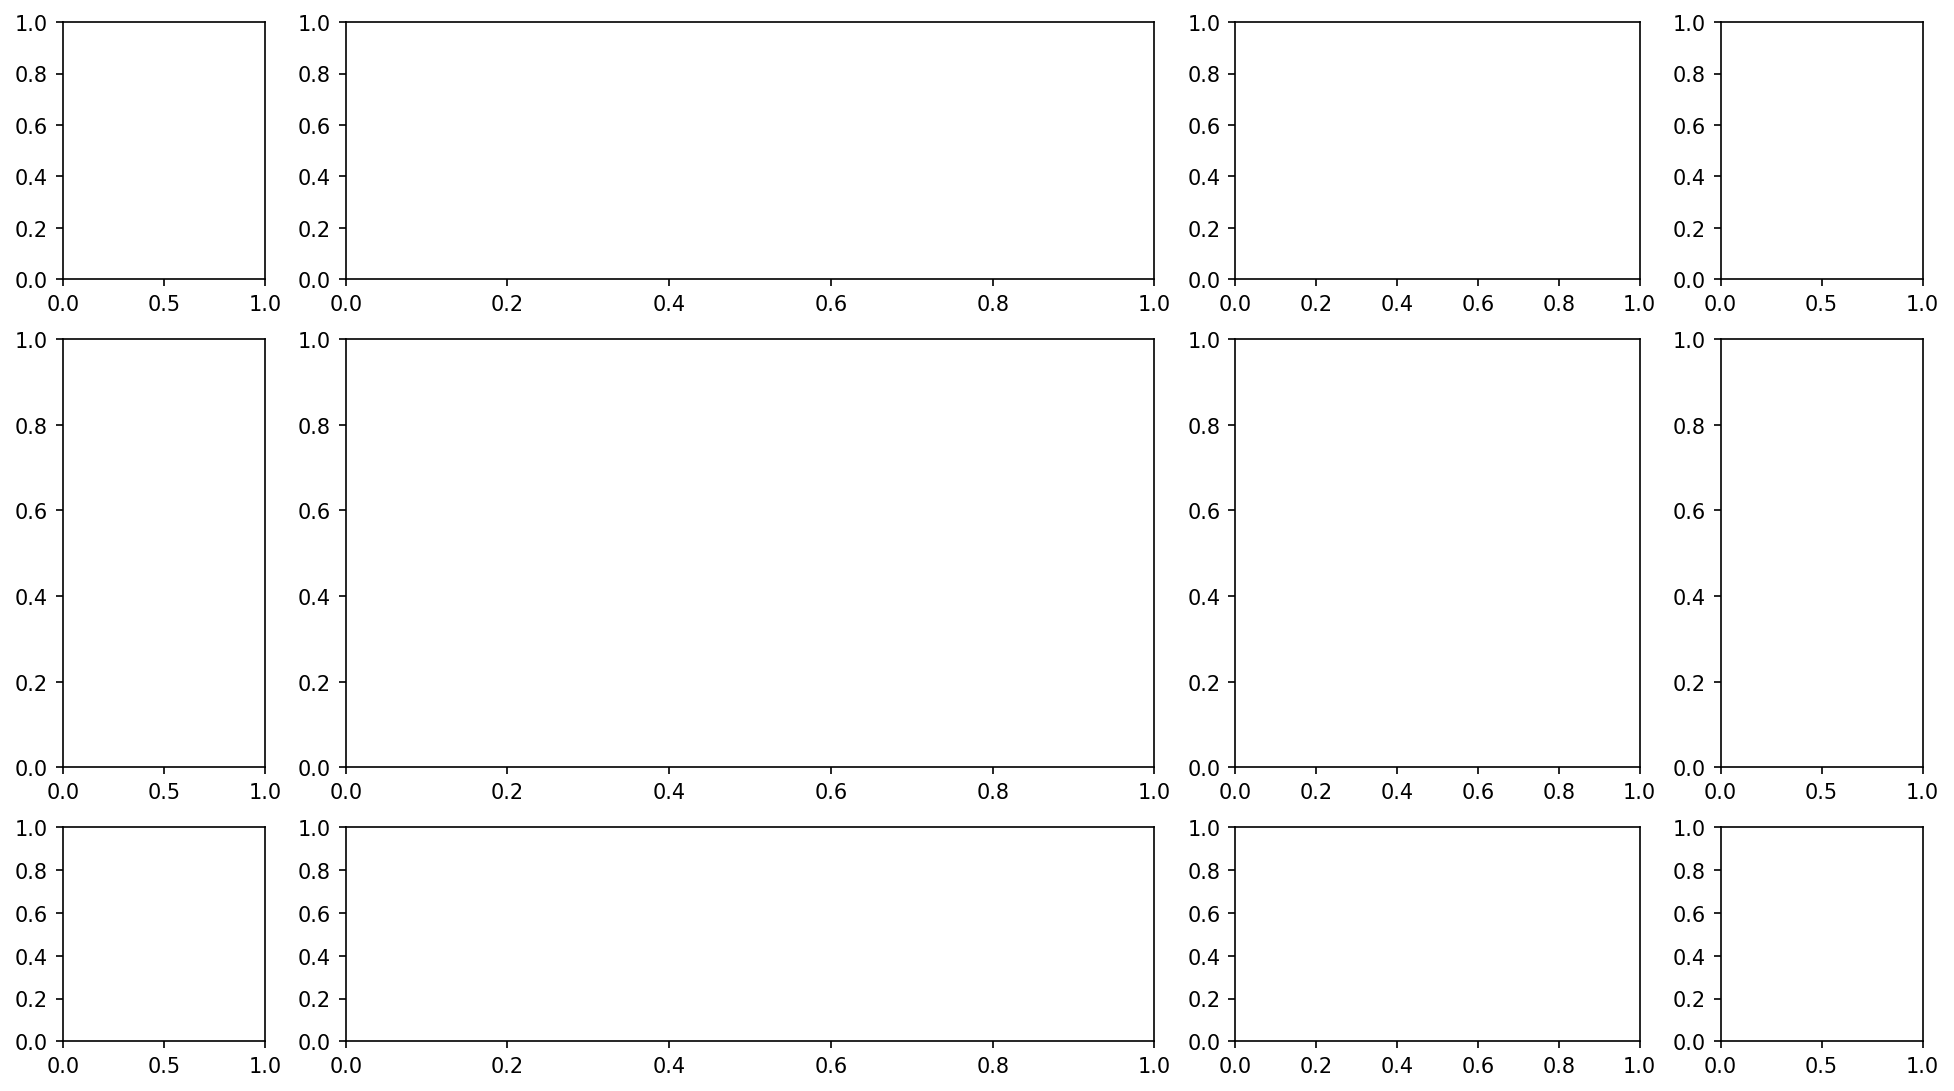

In [4]:
w = 4
h = 3
nrows = 3
ncols = 4
fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols,h*nrows), dpi=150,
                       gridspec_kw={"width_ratios": [0.5, 2.0, 1.0, 0.5], 
                                    "height_ratios":[0.6, 1.0, 0.5]})

plt.show()

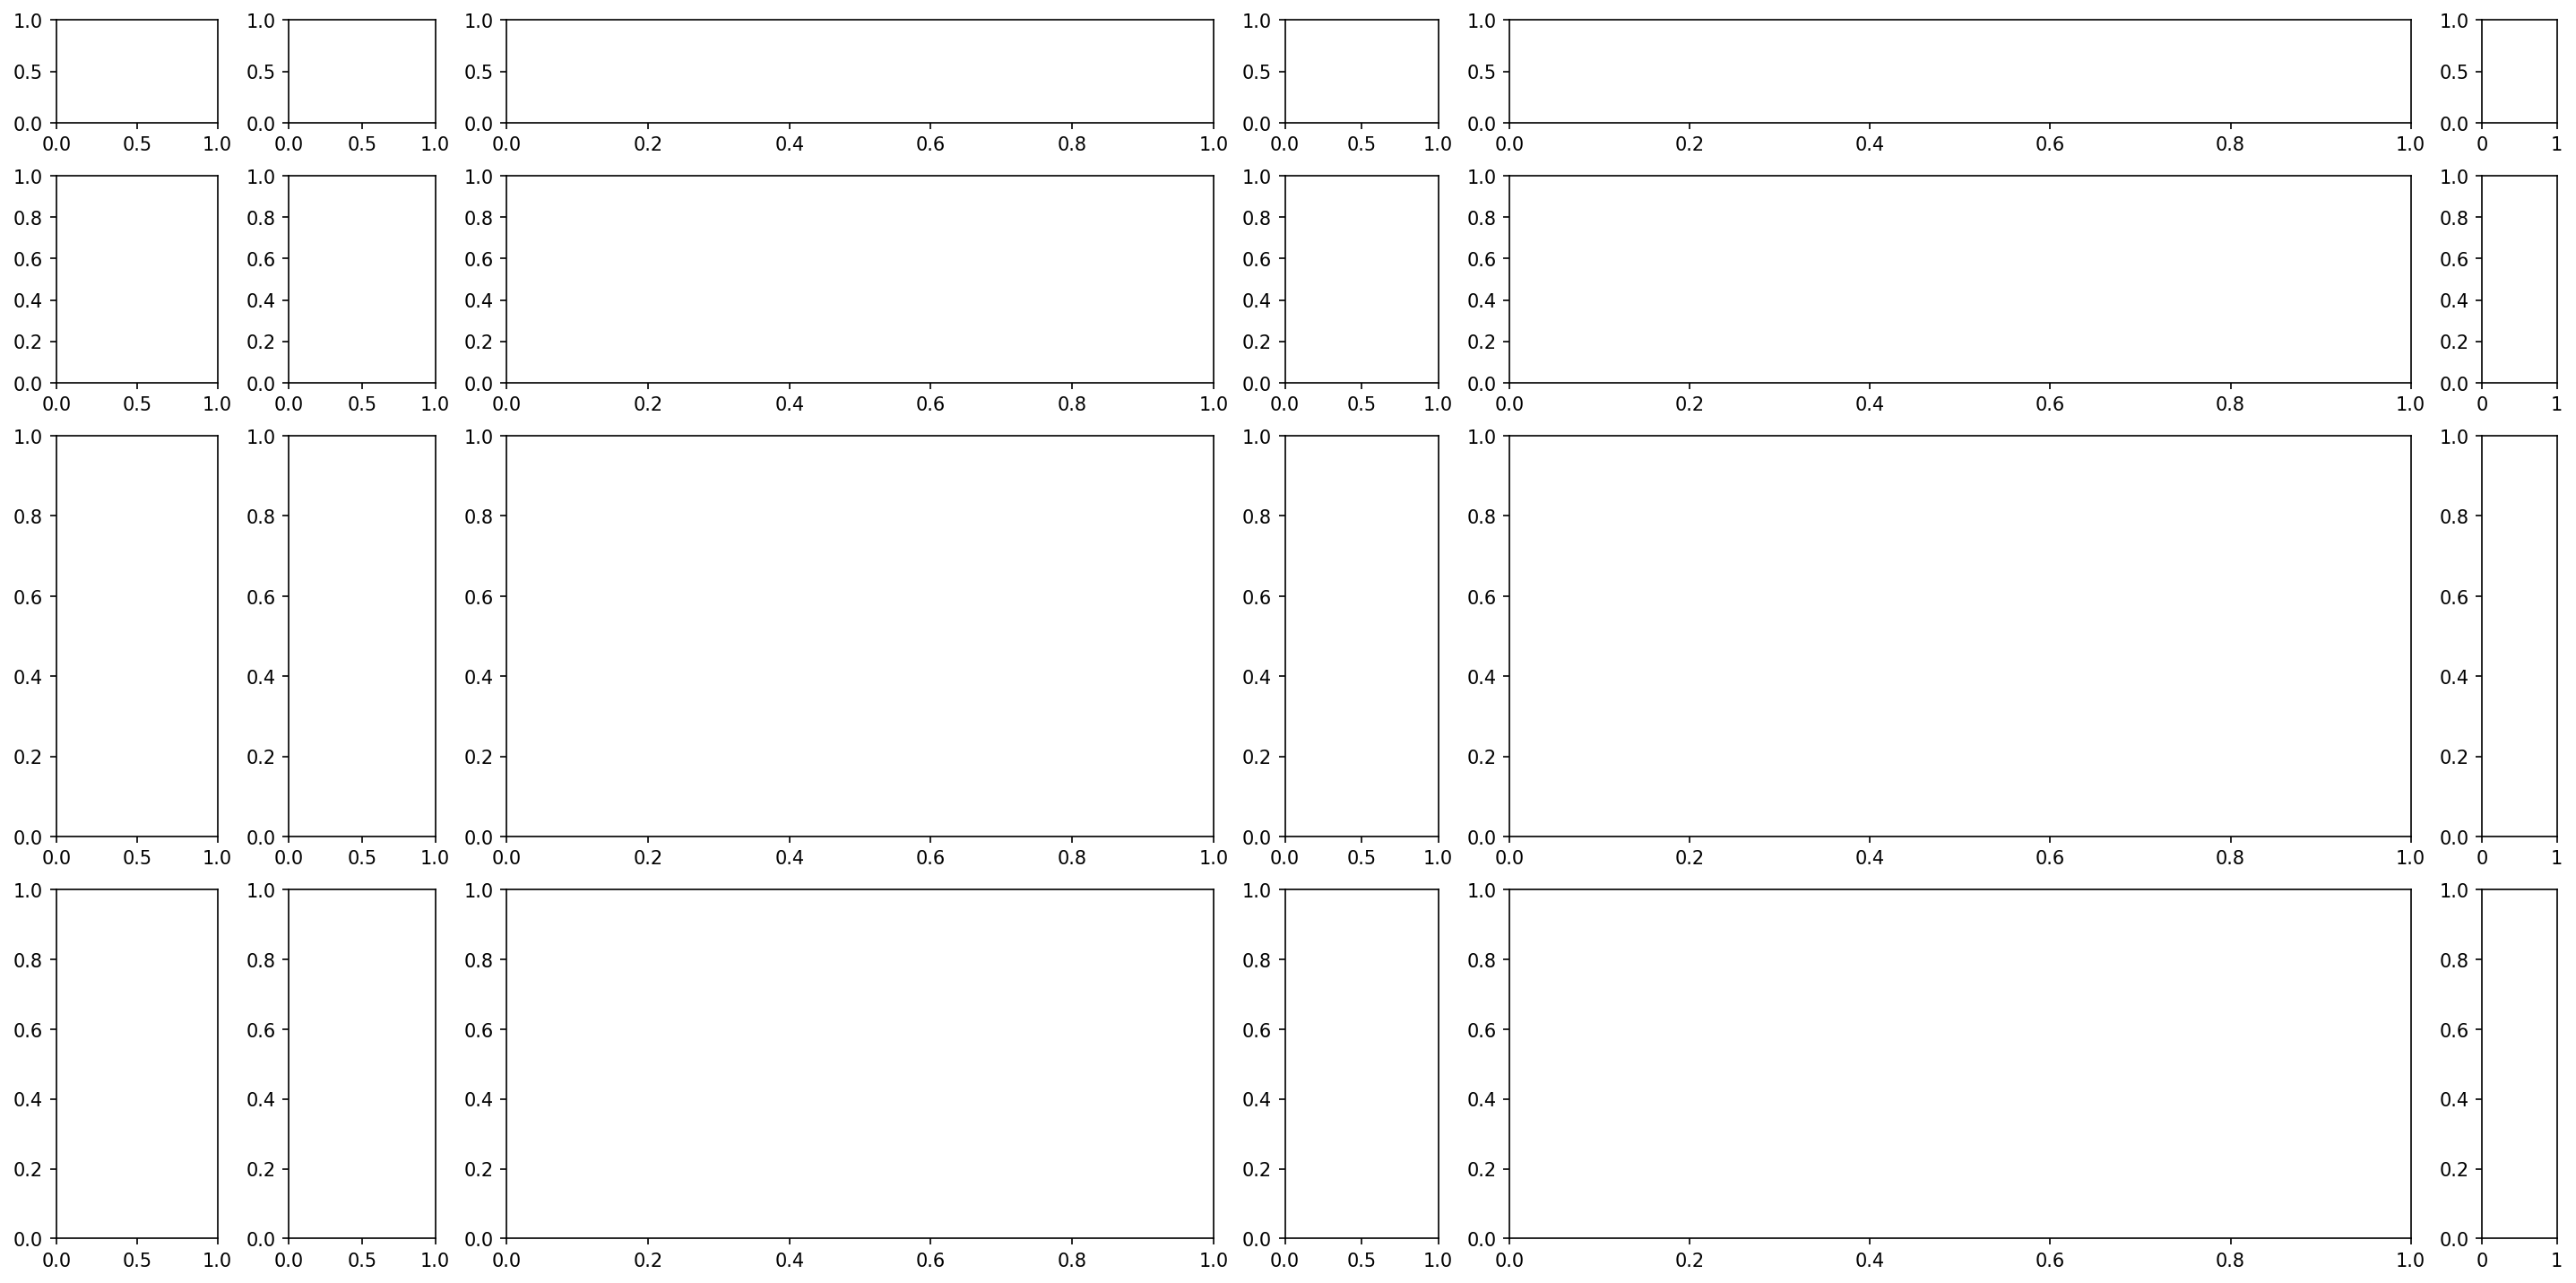

In [6]:
w = 4
h = 3
nrows = np.random.randint(6)+2
ncols = np.random.randint(6)+2
fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols,h*nrows), dpi=150,
                       gridspec_kw={"width_ratios": np.random.uniform(0.1, 1.5, ncols),
                                    "height_ratios":np.random.uniform(0.1, 1.5, nrows)})

plt.show()

_______________

# Tip 4
Spacing! Between! __ -  _ _ - _ Your! _ _ _ Subplots

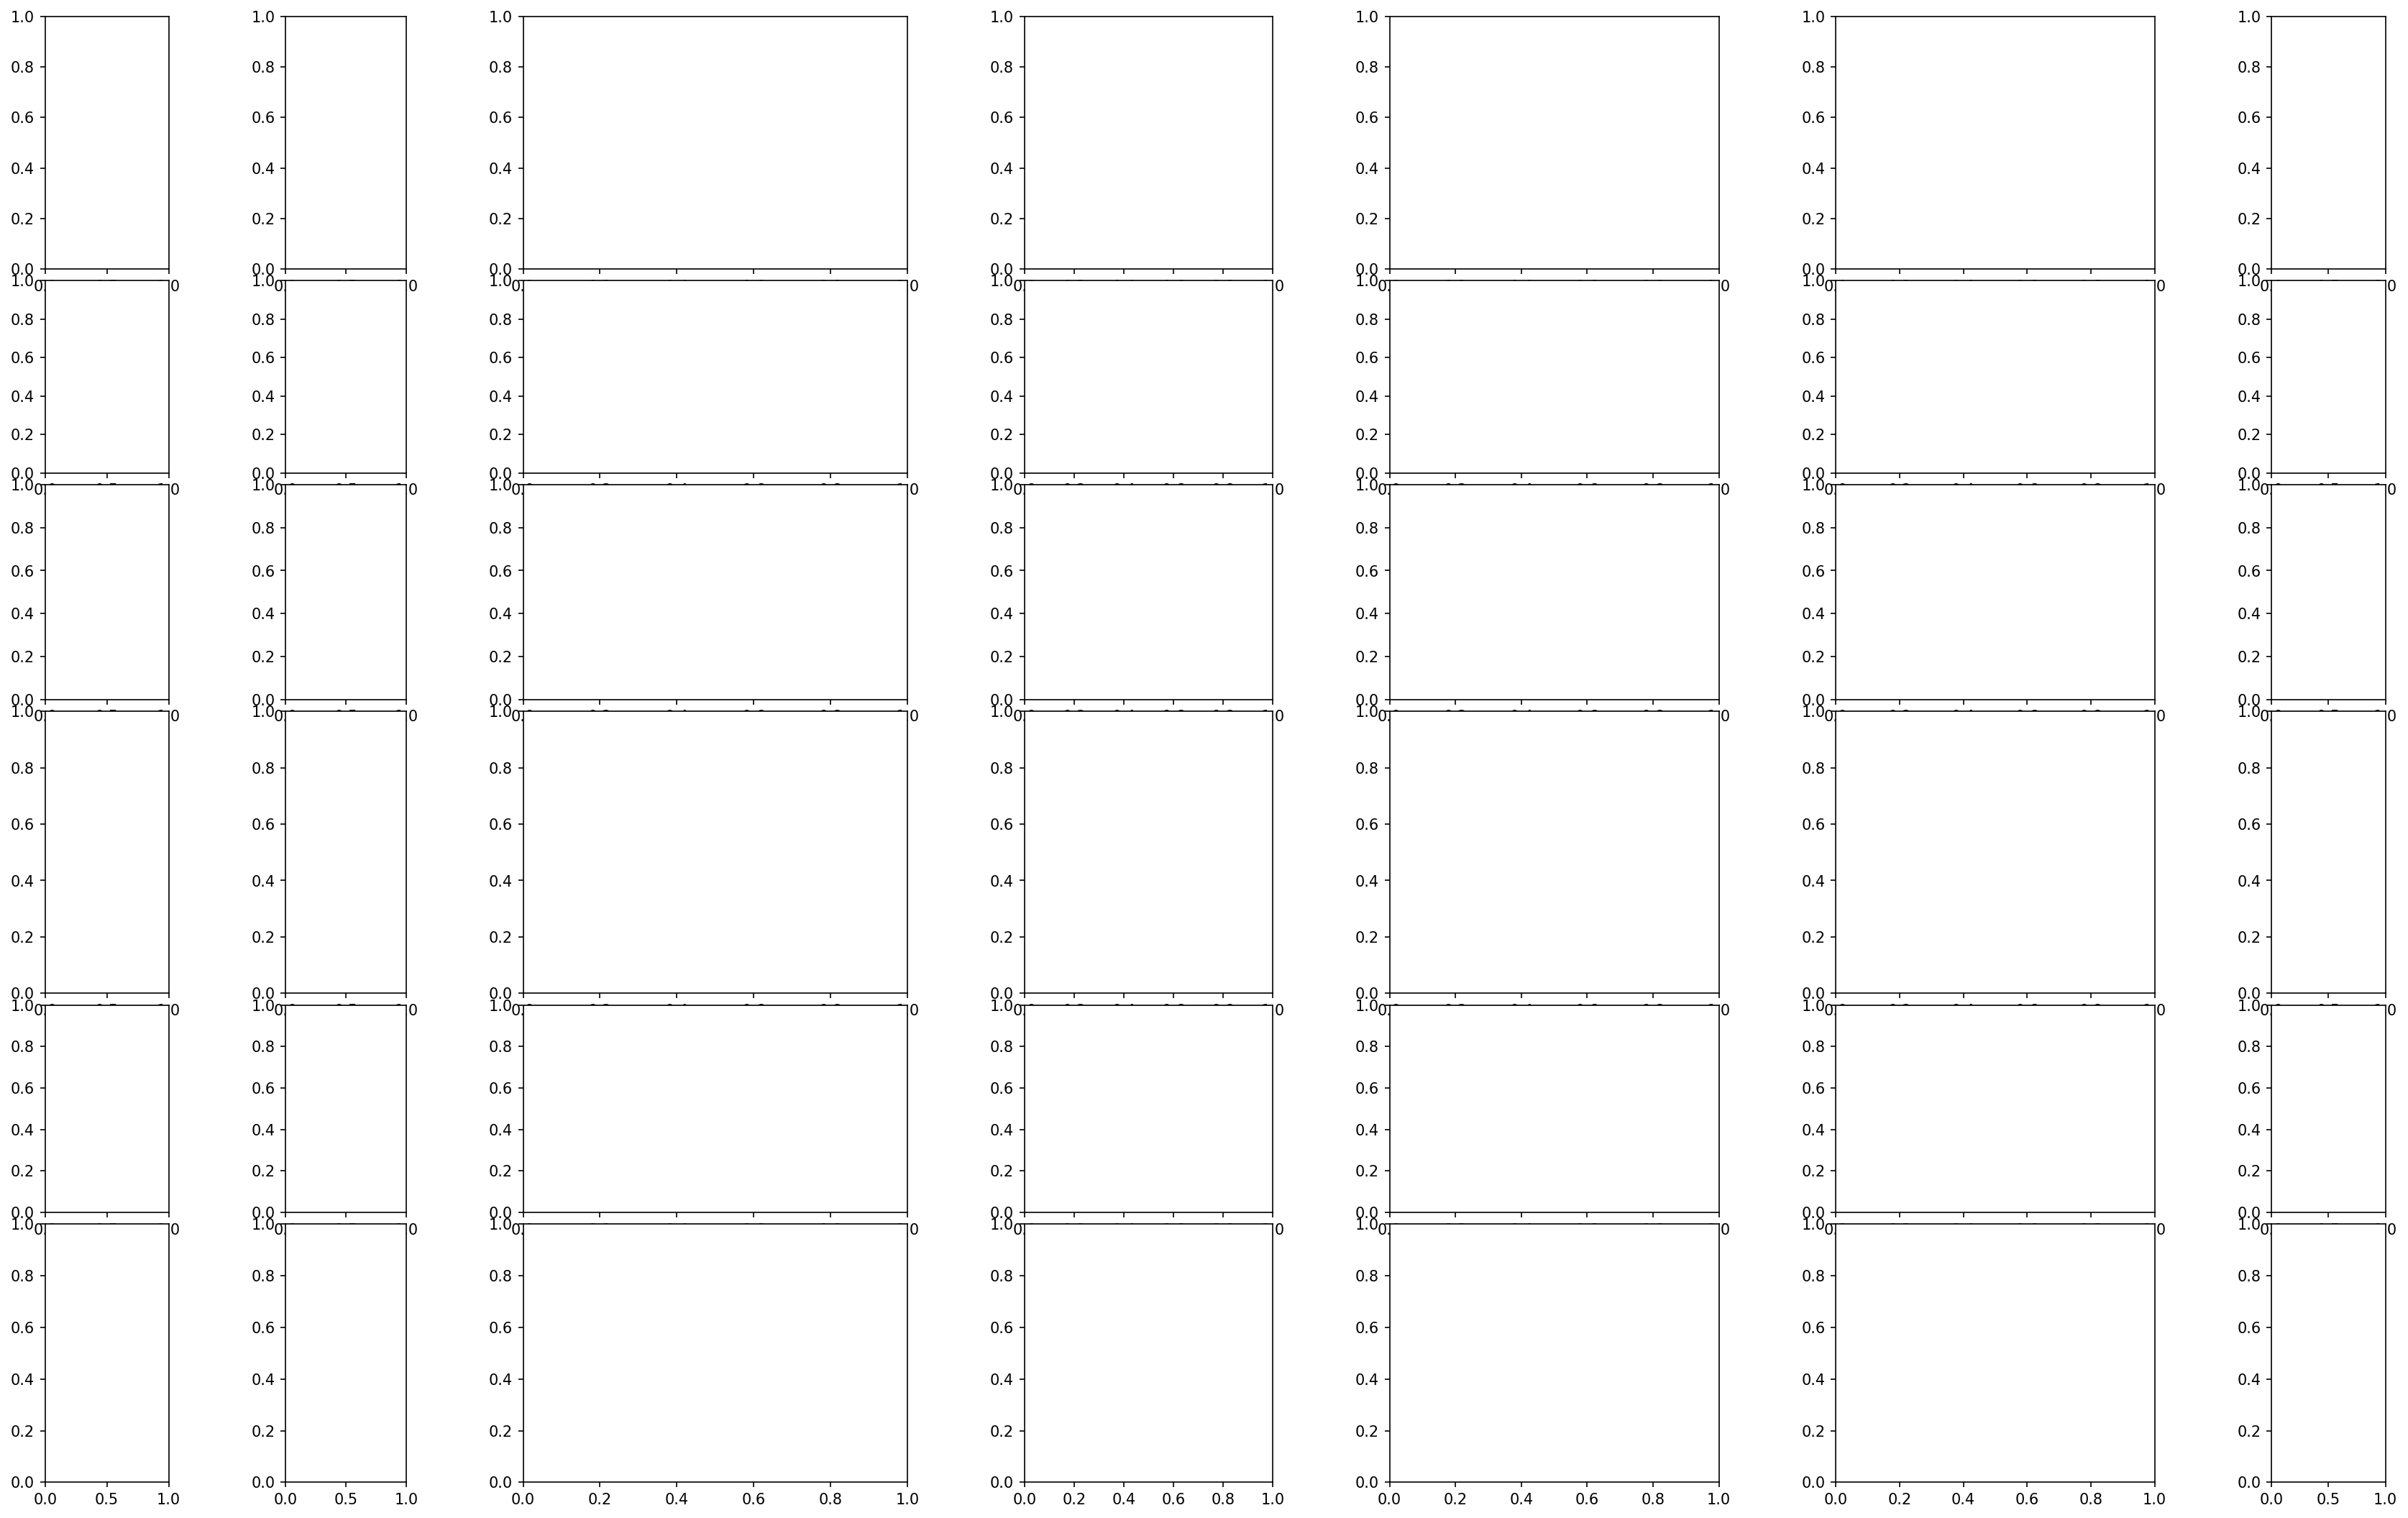

In [6]:
w = 4
h = 3
nrows = np.random.randint(6)+2
ncols = np.random.randint(6)+2
fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols,h*nrows), dpi=150,
                       gridspec_kw={"width_ratios": np.random.uniform(0.1, 1.5, ncols),
                                    "height_ratios":np.random.uniform(0.1, 1.5, nrows)})

plt.subplots_adjust(wspace=0.50, hspace=0.05)
# not that much "heightspace" between subplots, kinda a lot of "widthspace"

plt.show()

________________

# Tip 5:
Text! Place it great!

There are two ways / ideaologies about how to place text on a subplot. 
1. My text is being placed in a specific spot on the subplot and all I need to know is coordinates between 0 and 1
2. My text is data-relevant and as such I need my xpos and ypos to have the same domain as my data

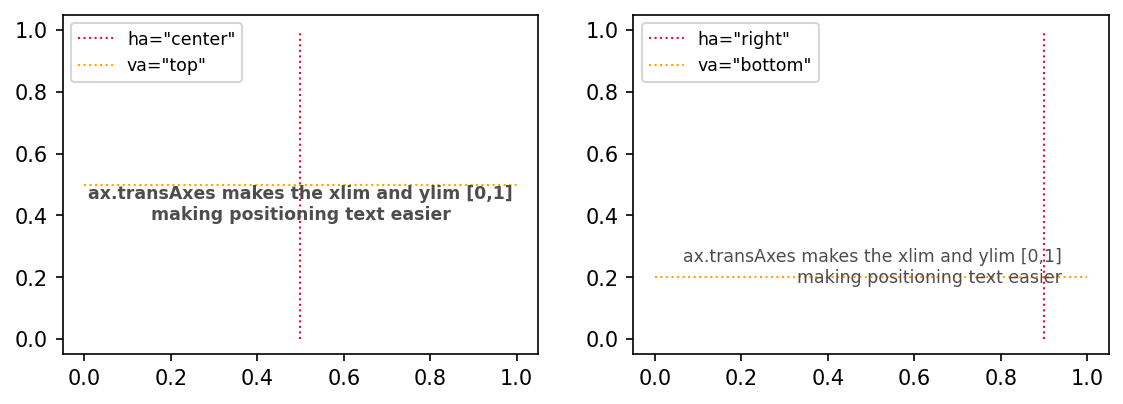

In [7]:
w = 4.5
h = 3
ncols = 2
nrows = 1
fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols,h*nrows), dpi=150)

actualtext = 'ax.transAxes makes the xlim and ylim [0,1]\nmaking positioning text easier'

############ ax[0]
xpos0 = 0.5
ypos0 = 0.5
ax[0].text(xpos0, ypos0, actualtext, transform=ax[0].transAxes,
        ha='center', va='top', color='.3', fontsize='small', fontweight='bold')
ax[0].vlines(xpos0, 0, 1, linestyle=':', linewidth=1, color='crimson', label='ha="center"')
ax[0].hlines(ypos0, 0, 1, linestyle=':', linewidth=1, color='orange', label='va="top"')
ax[0].legend(fontsize='small', loc=2)

############ ax[1]
xpos1 = 0.9
ypos1 = 0.2
ax[1].text(xpos1, ypos1, actualtext, transform=ax[1].transAxes,
        ha='right', va='bottom', color='.3', fontsize='small')
ax[1].vlines(xpos1, 0, 1, linestyle=':', linewidth=1, color='crimson', label='ha="right"')
ax[1].hlines(ypos1, 0, 1, linestyle=':', linewidth=1, color='orange', label='va="bottom"')
ax[1].legend(fontsize='small', loc=2)

# plt.savefig('../figs/pngs/figure1.png', dpi=425, bbox_inches='tight')
# plt.savefig('../figs/pdfs/figure1.pdf', bbox_inches='tight')
plt.show()

_________________

# Tip 6:
itertools is your friend and likely your best friend. Check this out for getting the list of your axis tuples

These are all your axis indices: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3)]


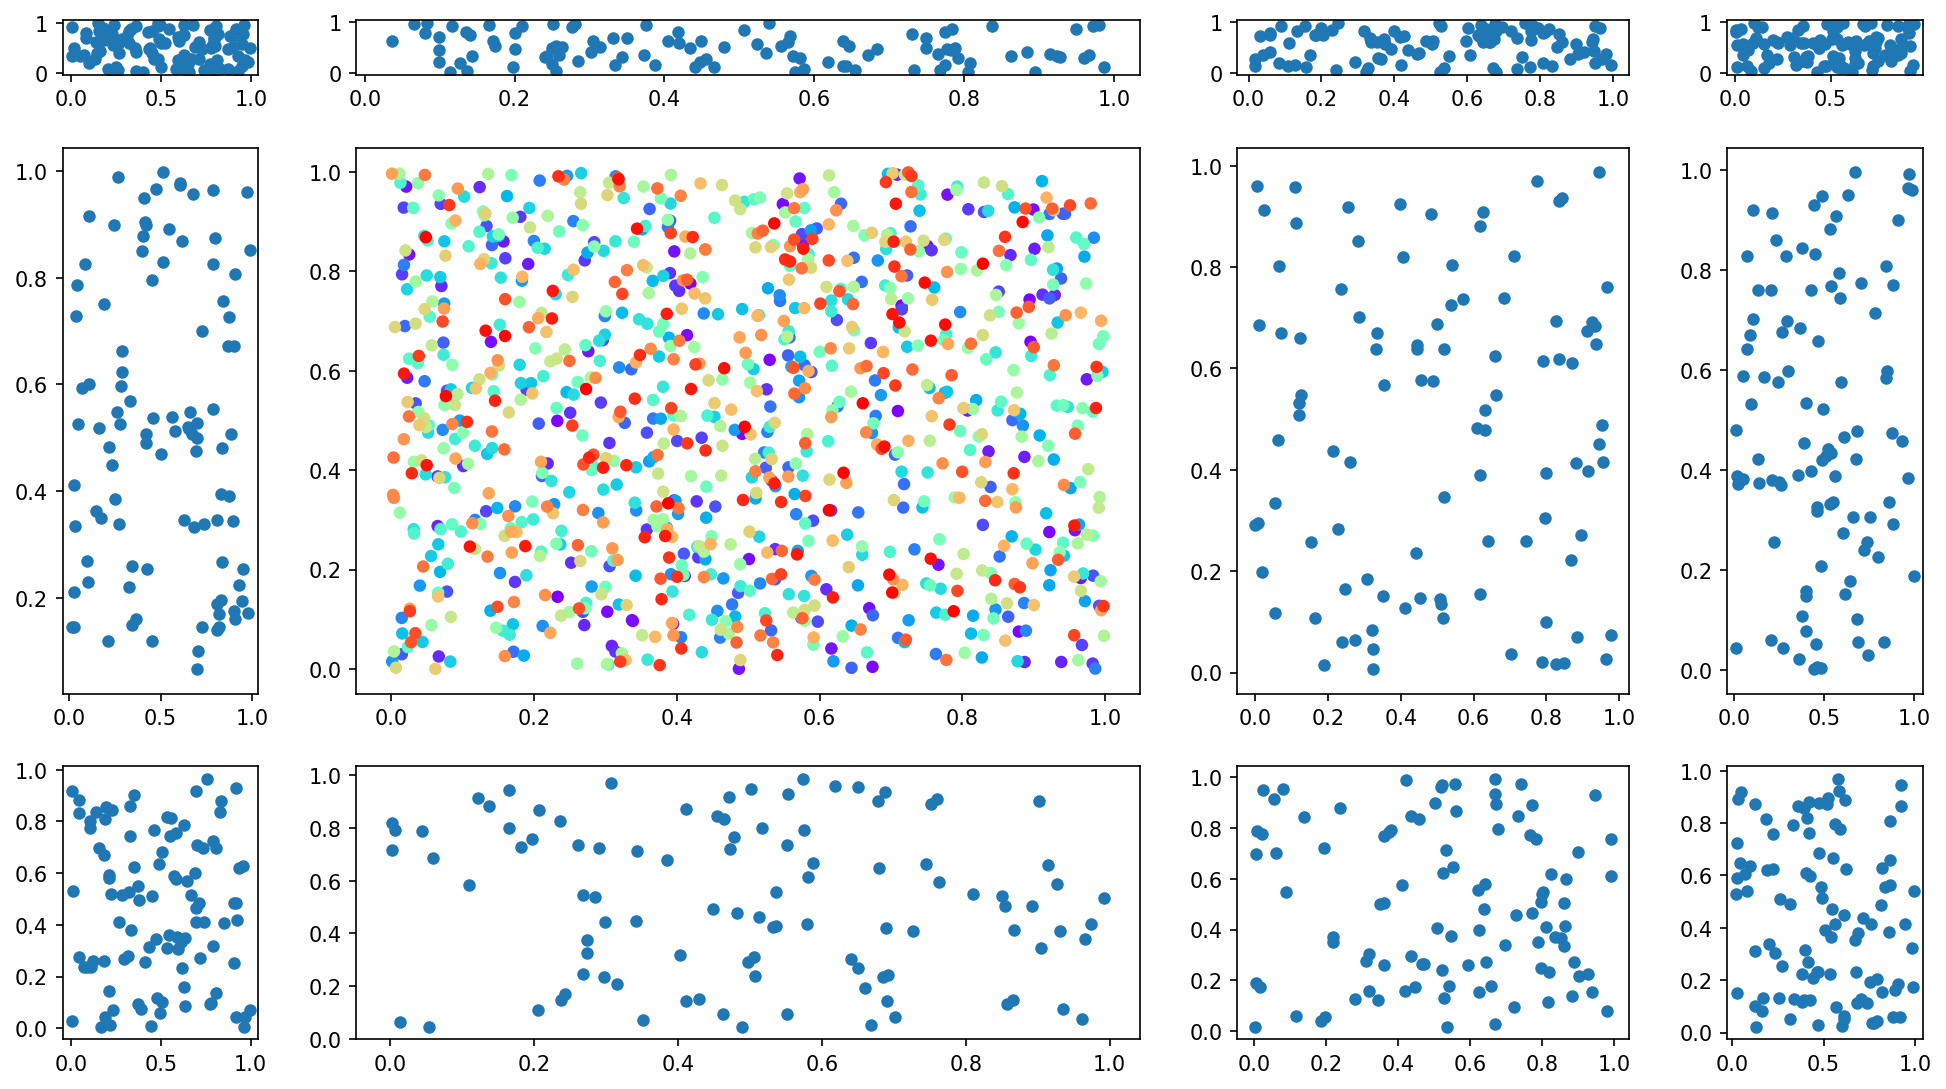

In [8]:
import itertools as it
w = 4
h = 3
nrows = 3
ncols = 4
fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols,h*nrows), dpi=150,
                       gridspec_kw={"width_ratios": [0.5, 2.0, 1.0, 0.5], 
                                    "height_ratios":[0.1, 1.0, 0.5]})
plt.subplots_adjust(wspace=0.25, hspace=0.25)

####*****####
tups = list(it.product(range(nrows), range(ncols)))
print("These are all your axis indices:",tups)
####*****####

for i, tup in enumerate(tups):
    if tup != (1,1):
        ax[tup].scatter(np.random.uniform(0,1,100),np.random.uniform(0,1,100), lw=0)
    else:
        ax[tup].scatter(np.random.uniform(0,1,1000),np.random.uniform(0,1,1000),
                        c=np.linspace(0,1,1000), cmap='rainbow', lw=0)

# plt.savefig('../figs/pngs/figure1.png', dpi=425, bbox_inches='tight')
# plt.savefig('../figs/pdfs/figure1.pdf', bbox_inches='tight')
plt.show()

____________________

# Tip 7:
do something to all the subplots.

Highly encouraged to make that something be adding grids

In [9]:
plt.rc('axes', axisbelow=True)
import itertools as it

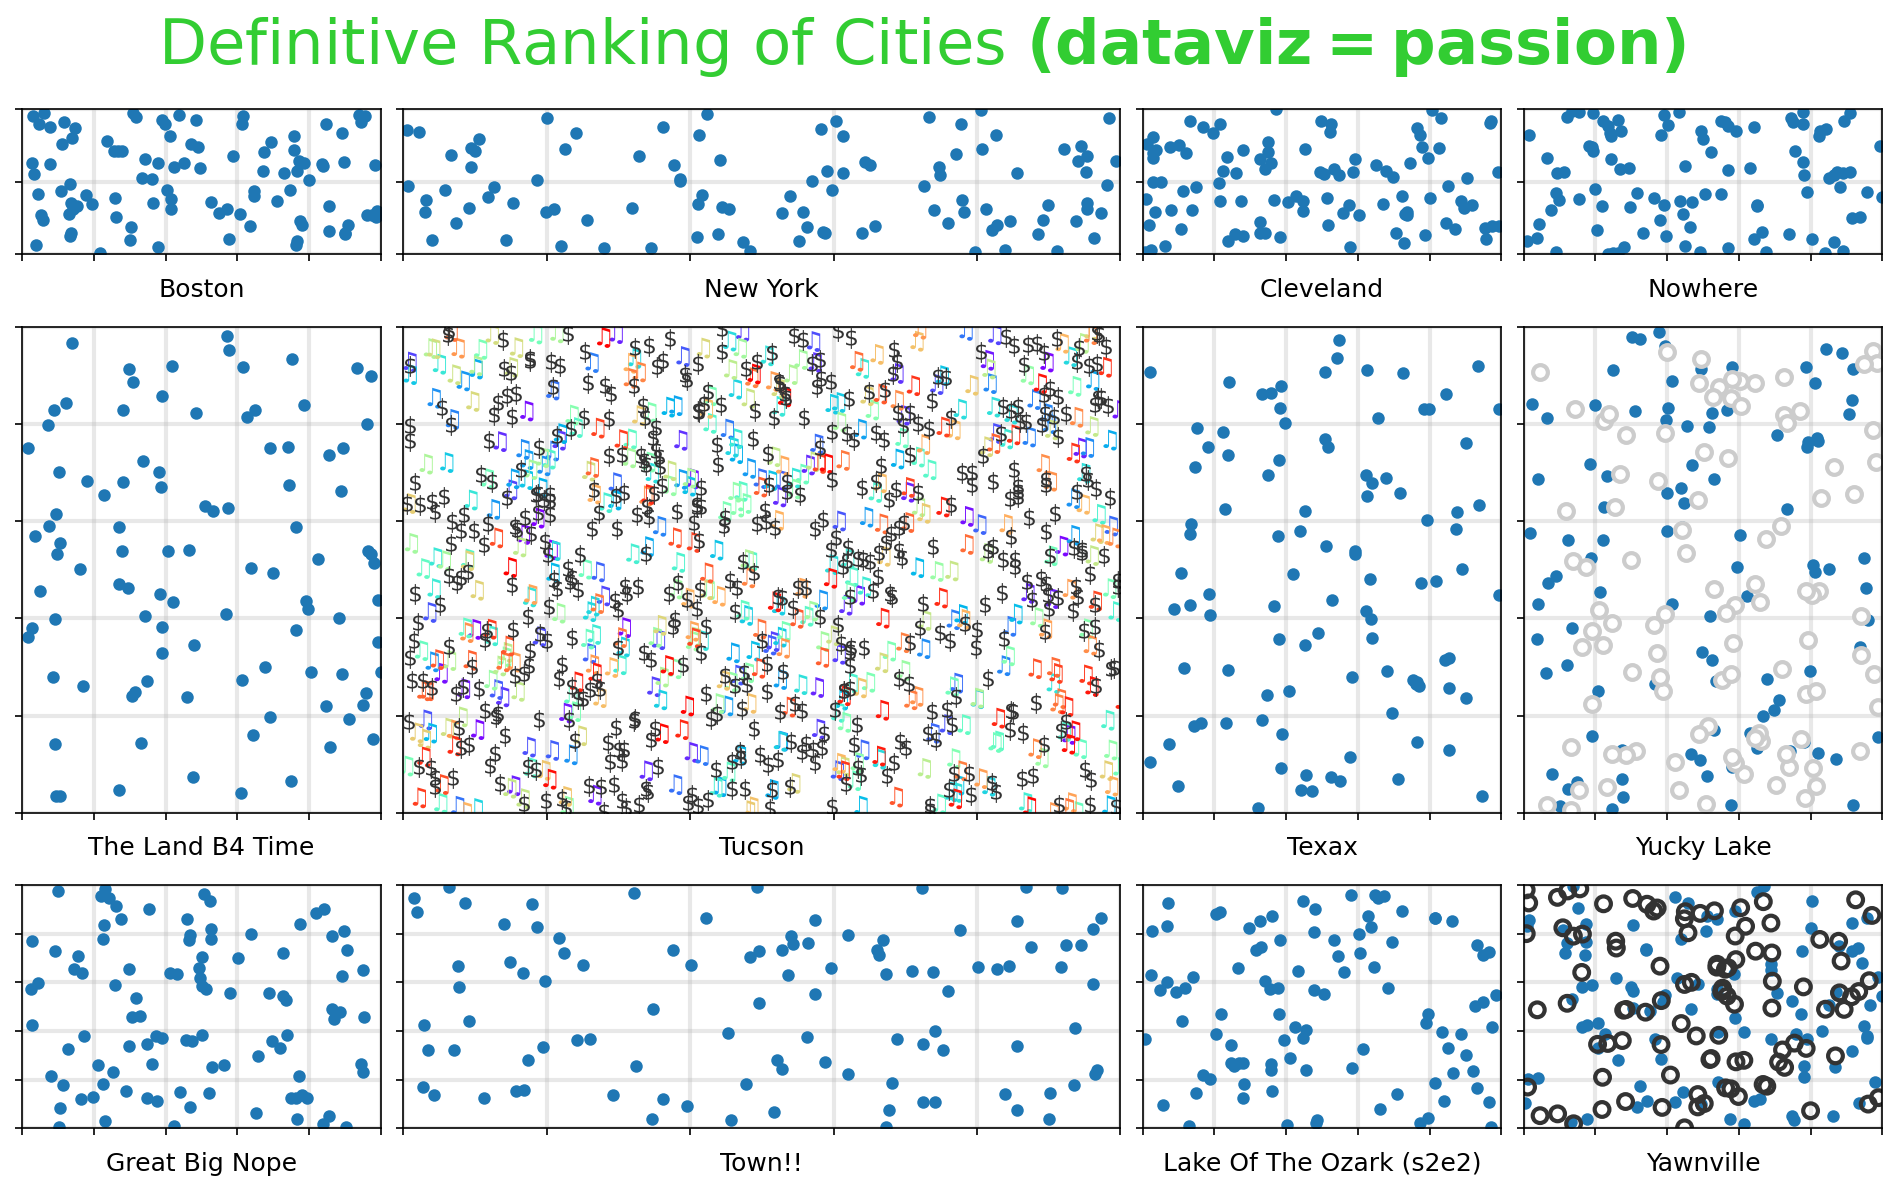

In [13]:
w = 4
h = 3
nrows = 3
ncols = 4
fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols,h*nrows), dpi=150,
                       gridspec_kw={"width_ratios": [1.0, 2.0, 1.0, 1.0], 
                                    "height_ratios":[0.3, 1.0, 0.5]})
plt.subplots_adjust(wspace=0.05, hspace=0.25)


tups = list(it.product(range(nrows), range(ncols)))

for i, tup in enumerate(tups):
    if tup != (1,1):
        ax[tup].scatter(np.random.uniform(0,1,100),np.random.uniform(0,1,100), lw=0)
    else:
        ax[tup].scatter(np.random.uniform(0,1,500),np.random.uniform(0,1,500),
                        c=np.linspace(0,1,500), cmap='rainbow', lw=0, marker="$\u266B$", s=100)
        ax[tup].scatter(np.random.uniform(0,1,500),np.random.uniform(0,1,500),
                        c='.2', lw=0, marker="$\$$", s=100)
    if tup == (2,3):
        ax[tup].scatter(np.random.uniform(0,1,100),np.random.uniform(0,1,100),
                        lw=2, c='None', ec='.2', s=50)
    if tup == (1,3):
        ax[tup].scatter(np.random.uniform(0,1,100),np.random.uniform(0,1,100),
                        lw=2, c='w', ec='.8', s=50)


xlabs = ['Boston', 'New York', 'Cleveland', 'Nowhere', 'The Land B4 Time', 'Tucson',
         'Texax', 'Yucky Lake', 'Great Big Nope', 'Town!!', 'Lake Of The Ozark (s2e2)', 'Yawnville']

plt.suptitle(r'Definitive Ranking of Cities $\mathbf{(dataviz=passion)}$', y=0.95, fontsize=30, color='limegreen')
for ai, a in enumerate(fig.axes):
    a.grid(linewidth=2, alpha=0.3, color='0.7')
    a.set_xlabel(xlabs[ai], fontsize='large')
    a.set_xlim(0,1)
    a.set_ylim(0,1)
    a.set_xticklabels(["" for i in a.get_xticks()])
    a.set_yticklabels(["" for i in a.get_xticks()])
    
    
plt.savefig('figs/pngs/figure12.png', dpi=425, bbox_inches='tight')
plt.savefig('figs/pdfs/figure12.pdf', bbox_inches='tight')
plt.show()

__________________

# Tip 8:
Writing a paper? How about one baseline fontsize?

also sneaking a "set_xticks([])" into this one

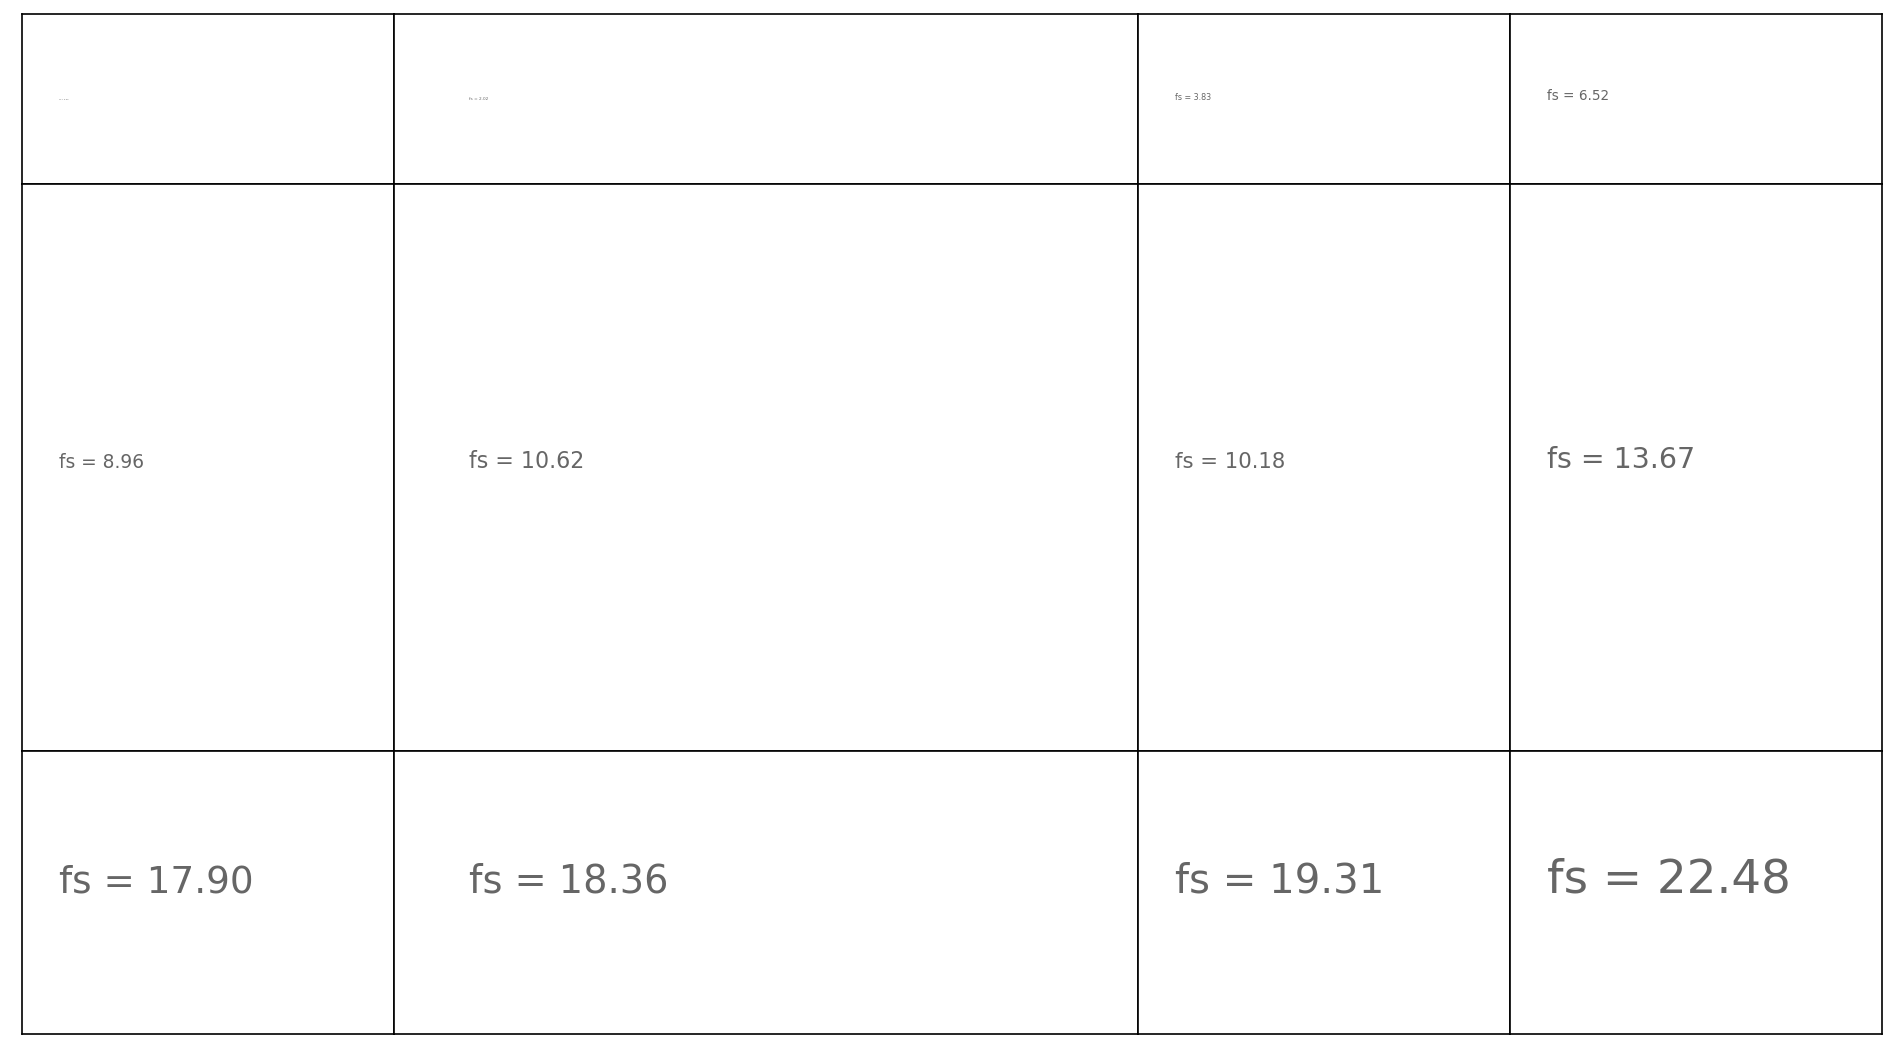

In [14]:
fs = 12

w = 4
h = 3
nrows = 3
ncols = 4
fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols,h*nrows), dpi=150,
                       gridspec_kw={"width_ratios": [1.0, 2.0, 1.0, 1.0], 
                                    "height_ratios":[0.3, 1.0, 0.5]})
plt.subplots_adjust(wspace=0.0, hspace=0.0)


tups = list(it.product(range(nrows), range(ncols)))

for ai, tup in enumerate(tups):
    fs_i = fs * (2*ai/len(tups)) + np.random.uniform(-2,2)
    ax[tup].text(0.1, 0.5, 'fs = %.2f'%fs_i, fontsize=fs_i, color='.4', ha='left')
    ax[tup].set_xticks([])
    ax[tup].set_yticks([])


# plt.savefig('../figs/pngs/figure1.png', dpi=425, bbox_inches='tight')
# plt.savefig('../figs/pdfs/figure1.pdf', bbox_inches='tight')
plt.show()

______________________

# Tip 9:
Here's a small one, how about putting percentages instead of fractions?

Also sneaking a sharey=True into this tip

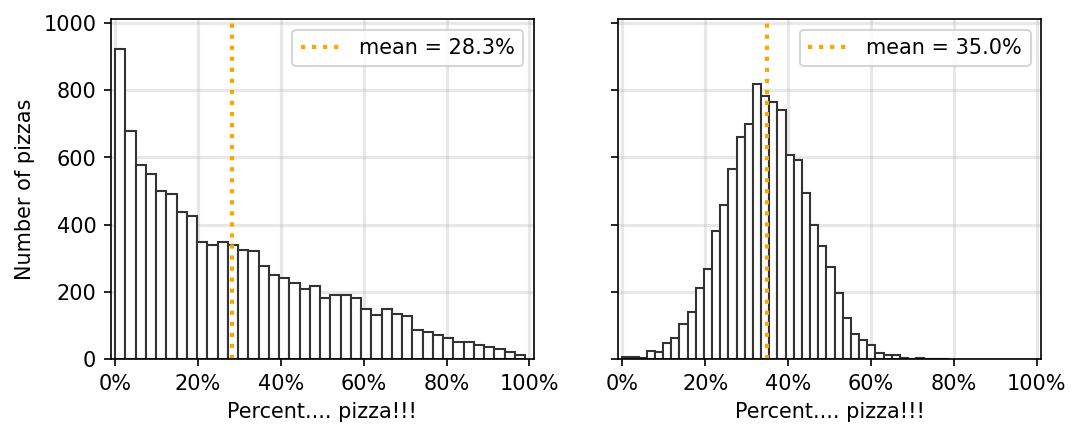

In [15]:
from matplotlib import ticker

raw_data1 = np.random.beta(0.8, 2, 10000)
raw_data1[raw_data1<=0] = 0
raw_data2 = np.random.normal(0.35, 0.1, 10000)
raw_data2[raw_data2<=0] = 0

fs = 12

w = 4
h = 3
nrows = 1
ncols = 2
fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols,h*nrows), dpi=150, sharey=True)

ax[0].hist(raw_data1, bins=40, ec='.2', color='w')
yticks = ax[0].get_yticks()

ax[0].vlines(np.mean(raw_data1), 0, yticks[-1]*1.01, color='orange',
          label='mean = %.1f%%'%(np.mean(raw_data1)*100), linestyle=':', lw=2)

ax[1].hist(raw_data2, bins=40, ec='.2', color='w')
ax[1].vlines(np.mean(raw_data2), 0, yticks[-1]*1.01, color='orange',
          label='mean = %.1f%%'%(np.mean(raw_data2)*100), linestyle=':', lw=2)

ax[0].set_ylabel('Number of pizzas')

for a in fig.axes:
    a.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))
    a.set_xlim(-0.01,1.01)
    a.set_ylim(yticks[0], yticks[-1]*1.01)
    a.legend()
    a.grid(linewidth=1.5, color='.7', alpha=0.3)
    a.set_xlabel('Percent.... pizza!!!')


# plt.savefig('../figs/pngs/figure1.png', dpi=425, bbox_inches='tight')
# plt.savefig('../figs/pdfs/figure1.pdf', bbox_inches='tight')
plt.show()

______________

# Tip 10:
(*worried whisper...*)

...It's scatterplot week....

*(pronounced like a Great British Bakeoff contestant)*

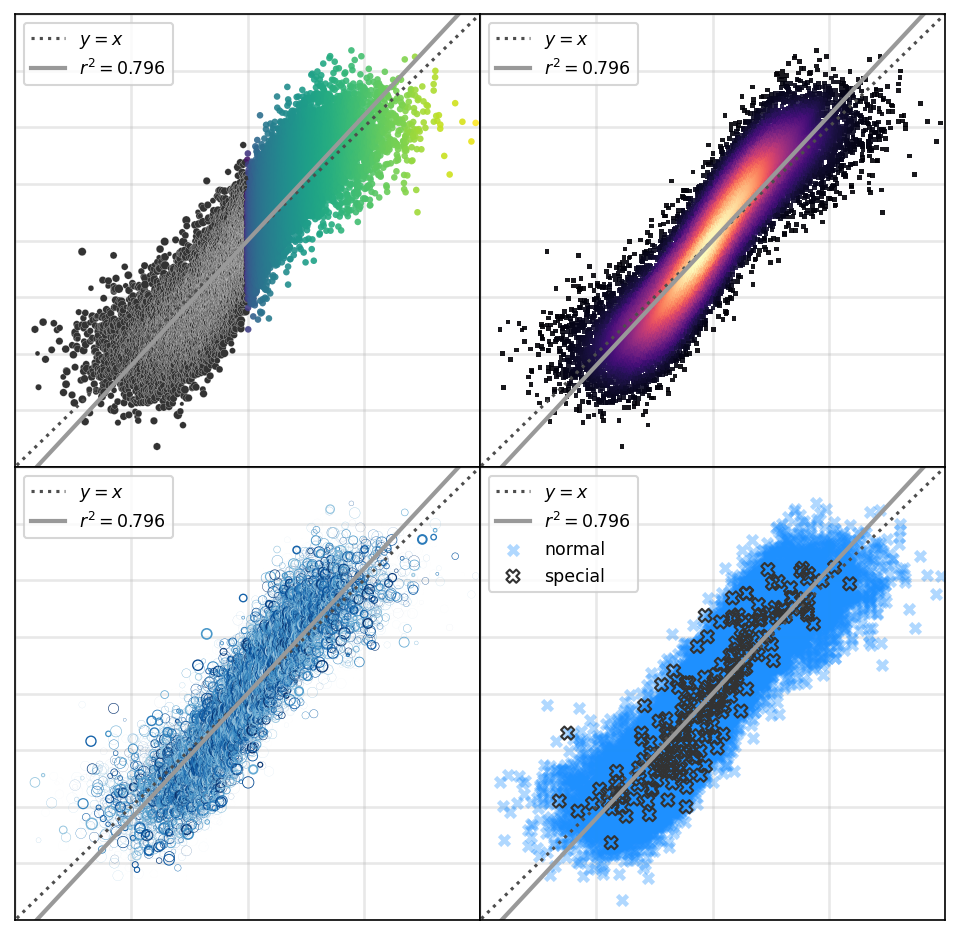

In [16]:
from scipy.stats import gaussian_kde
from scipy.stats import linregress

# so let's play with some fake data
raw_data_x = np.array(sorted(np.random.normal(0.5,0.25,20000)))
raw_data_y = np.linspace(0.01,0.99,20000)+np.random.normal(0.0,0.125,20000)
slope, intercept, rvalue, pvalue, stderr = linregress(raw_data_x, raw_data_y)
xslope = [min(raw_data_x), max(raw_data_x)]
yslope = [xslope[i]*slope+intercept for i in range(len(xslope))]

w = 4
h = 4
nrows = 2
ncols = 2
fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols,h*nrows), dpi=150)
plt.subplots_adjust(hspace=0,wspace=0)

tups = list(it.product(range(nrows), range(ncols)))

########## ax[(0,0)]
ax[tups[0]].scatter(raw_data_x[:10000], raw_data_y[:10000], ec='w',
           lw=0.1, s=np.random.normal(12,2.5,10000), c='.2')
ax[tups[0]].scatter(raw_data_x[10000:], raw_data_y[10000:], ec='w',
           lw=0, s=10, c=raw_data_x[::2], cmap='viridis', alpha=0.9)

########## ax[(0,1)]
xy = np.vstack([raw_data_x, raw_data_y])
z = gaussian_kde(xy)(xy)
ax[tups[1]].scatter(raw_data_x, raw_data_y, lw=0, s=5, c=z, cmap='magma', alpha=0.9, marker='s')

########## ax[(1,0)]
cc = plt.cm.Blues(np.random.uniform(0.3,1,len(raw_data_x)))
ax[tups[2]].scatter(raw_data_x, raw_data_y, lw=np.random.beta(0.2, 2.0, len(raw_data_x)),
                    s=np.random.uniform(2, 30, len(raw_data_x)), fc='None', ec=cc, marker='o')

########## ax[(1,1)]
inds = np.random.choice(range(len(raw_data_x)), size=int(0.01*len(raw_data_x)), replace=False)
ax[tups[3]].scatter(raw_data_x, raw_data_y, lw=0, s=40, c='dodgerblue',
                    marker='X', alpha=0.35, label='normal')
ax[tups[3]].scatter(raw_data_x[inds], raw_data_y[inds], lw=1, s=40, c='None',
                    marker='X', ec='.2', label='special')


for a in fig.axes:
    a.set_ylim(-0.5,1.5)
    a.set_xlim(-0.5,1.5)
    a.plot([-2,2],[-2,2],color='.3',linestyle=':',label=r'$y=x$')
    a.plot(xslope, yslope, color='.6', linewidth=2, label=r'$r^2 = %.3f$'%(rvalue**2))
    a.grid(linewidth=1.25, color='.7', alpha=0.3)
    a.set_xticklabels(["" for i in a.get_xticks()])
    a.set_yticklabels(["" for i in a.get_xticks()])
    a.tick_params(axis='both',which='both',length=0)
    a.legend(loc=2, fontsize='small')

# plt.savefig('../figs/pngs/figure1.png', dpi=425, bbox_inches='tight')
# plt.savefig('../figs/pdfs/figure1.pdf', bbox_inches='tight')
plt.show()

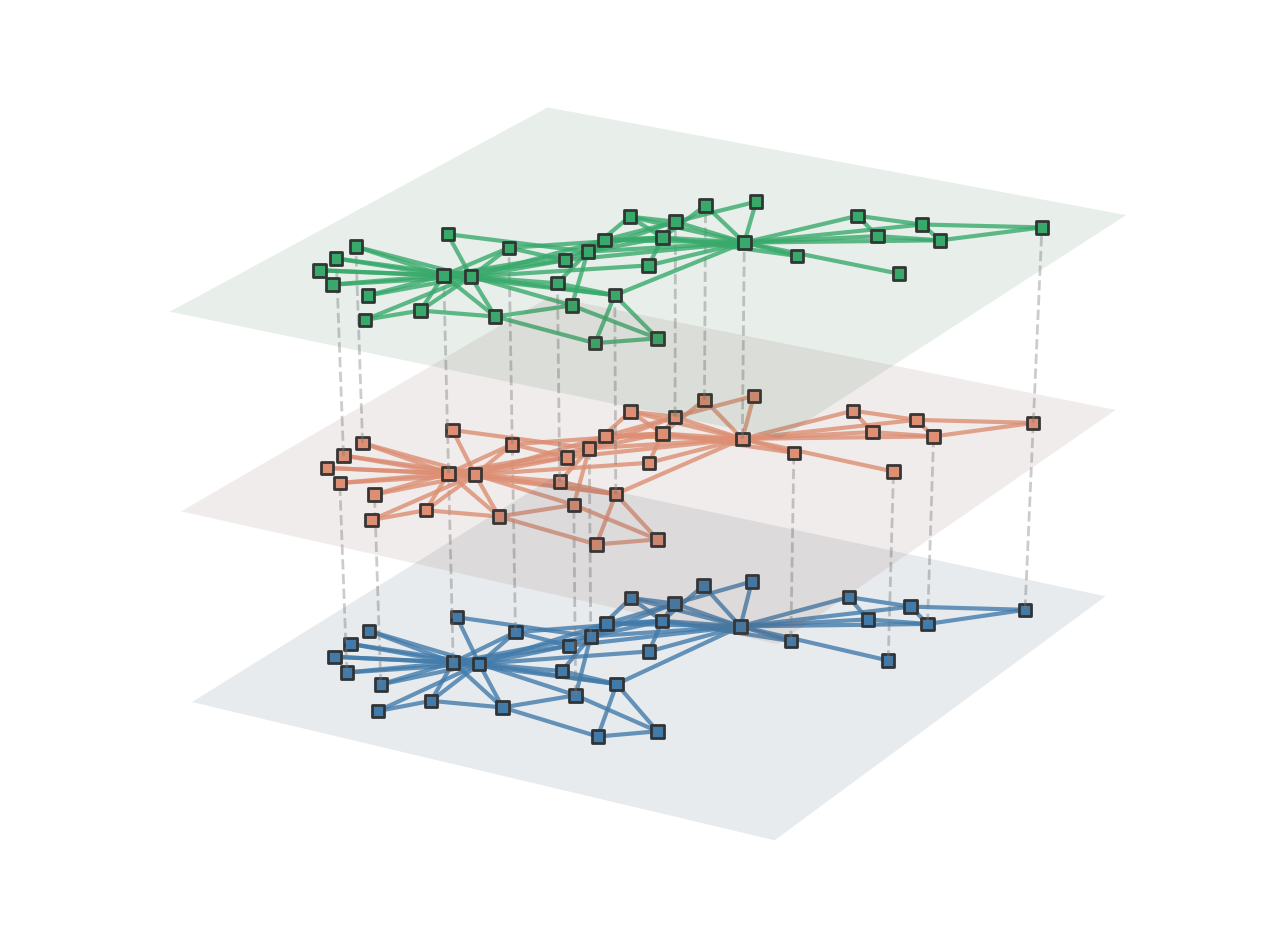

In [4]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
from mpl_toolkits.mplot3d.art3d import Line3DCollection

cols = ['steelblue', 'darksalmon', 'mediumseagreen']

G1 = nx.karate_club_graph()
G2 = nx.karate_club_graph()
G3 = nx.karate_club_graph()
graphs = [G1,G2, G3]
# pos = nx.spring_layout(G1) # assuming common node location

w = 8
h = 6

fig, ax = plt.subplots(1,1,figsize=(w,h),dpi=200, subplot_kw={'projection':'3d'})

for gi, G in enumerate(graphs):
    # node positions
    xs = list(list(zip(*list(pos.values())))[0])
    ys = list(list(zip(*list(pos.values())))[1])
    zs = [gi]*len(xs)

    # node colors
    cs = [cols[gi]]*len(xs)
    if gi > 0:
        thru_nodes = np.random.choice(list(G.nodes()),10,replace=False)
        lines3d_between = [(list(pos[i])+[gi-1],list(pos[i])+[gi]) for i in thru_nodes]
        between_lines = Line3DCollection(lines3d_between, zorder=gi, color='.5', alpha=0.4,
                                         linestyle='--', linewidth=1)
        ax.add_collection3d(between_lines)

    # add edges first
    lines3d = [(list(pos[i])+[gi],list(pos[j])+[gi]) for i,j in G.edges()]
    line_collection = Line3DCollection(lines3d, zorder=gi, color=cols[gi], alpha=0.8)
    ax.add_collection3d(line_collection)
    
    # now add nodes
    ax.scatter(xs, ys, zs, c=cs, edgecolors='.2', marker='s', alpha=1, zorder=gi)
    
    # add a plane to designate the layer
    xdiff = max(xs)-min(xs)
    ydiff = max(ys)-min(ys)
    ymin = min(ys)-ydiff*0.1
    ymax = max(ys)+ydiff*0.1
    xmin = min(xs)-xdiff*0.1 * (w/h)
    xmax = max(xs)+xdiff*0.1 * (w/h)
    xx, yy = np.meshgrid([xmin, xmax],[ymin, ymax])
    zz = np.zeros(xx.shape)+gi
    ax.plot_surface(xx, yy, zz, color=cols[gi], alpha=0.1, zorder=gi)


# set them all at the same x,y,zlims
ax.set_ylim(min(ys)-ydiff*0.1,max(ys)+ydiff*0.1)
ax.set_xlim(min(xs)-xdiff*0.1,max(xs)+xdiff*0.1)
ax.set_zlim(-0.1, len(graphs) - 1 + 0.1)

# select viewing angle
angle = 30
height_angle = 30
ax.view_init(height_angle, angle)
ax.set_axis_off()

# plt.savefig('../figs/pngs/multilayer_network.png',dpi=425,bbox_inches='tight')
plt.show()